### Welche ML Algortihmen werden benutzt ?
### Regression Problem
Lineare Regression  <br>
DecisionTreeRegressor <br>
Support Vector Regression (SVR)<br>
Random Forest (RandomForestRegressor)<br>
KNeighborsClassifier (Knn)<br>
GradientBoostingRegressor

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

### Welche Datensatz?
linnerud <br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud

In [2]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
X = linnerud.data
y = linnerud.target

print("Features:")
print(diabetes.feature_names)
print("Target:")
print(diabetes.target)

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
print(diabetes_df.head())

In [3]:
k=10 #Anzahl der Folds
#X, y = shuffle(X, y, random_state=4)  # Daten mischen, das stellt sicher, dass beide Modelle exakt dieselben Folds zur Validierung verwenden
kf = KFold(n_splits=k, shuffle=True, random_state=42) #Folds bei allen Modellen identisch #7 gutes Ergebniss #42mittel #3 schwieriges Ergebniss
#kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

**StratifiedKFold**  stellt sicher, dass jeder Fold eine ähnliche Klassenverteilung wie der Gesamtdatensatz aufweist. 
hilft die Repräsentativität der Folds zu verbessern und liefert robustere Validierungsergebnisse,
insbesondere bei **unausgewogenen Datensätzen**.

### Foldverteilung anzeigen

In [4]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print()

Fold 1
Train Index: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19]
Test Index: [ 0 17]

Fold 2
Train Index: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]
Test Index: [ 1 15]

Fold 3
Train Index: [ 0  1  2  3  4  6  7  9 10 11 12 13 14 15 16 17 18 19]
Test Index: [5 8]

Fold 4
Train Index: [ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17 18 19]
Test Index: [ 3 11]

Fold 5
Train Index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 19]
Test Index: [16 18]

Fold 6
Train Index: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19]
Test Index: [ 2 13]

Fold 7
Train Index: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18]
Test Index: [ 9 19]

Fold 8
Train Index: [ 0  1  2  3  5  6  7  8  9 10 11 13 14 15 16 17 18 19]
Test Index: [ 4 12]

Fold 9
Train Index: [ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 17 18 19]
Test Index: [ 7 10]

Fold 10
Train Index: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 15 16 17 18 19]
Test Index: [ 6 14]



In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
linreg = LinearRegression()
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
gb_reg = GradientBoostingRegressor()


In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [17]:
# ## Code for F1-Score
linreg_cross_val_scores = cross_val_score(linreg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
tree_reg_cross_val_scores = cross_val_score(tree_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
rf_reg_cross_val_scores = cross_val_score(rf_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
svr_cross_val_scores = cross_val_score(svr, X, y, cv=kf, scoring="neg_mean_absolute_error",multioutput='uniform_average').mean()
gb_reg_cross_val_scores = cross_val_score(gb_reg, X, y, cv=kf, scoring="neg_mean_absolute_error",multioutput='uniform_average').mean()

TypeError: got an unexpected keyword argument 'multioutput'

In [11]:
#print(linreg_cross_val_scores)
print(linreg_cross_val_scores)
print(tree_reg_cross_val_scores)
print(rf_reg_cross_val_scores)
#print(svr_cross_val_scores)
#print(gb_reg_cross_val_scores)

-9.77505605623318
-10.51666666666667
-10.261000000000001


In [12]:
cross_val_scores = {
    'Linear Regression': linreg_cross_val_scores,
    'Decision Tree': tree_reg_cross_val_scores,
    'Random Forest': rf_reg_cross_val_scores,
    #'Support Vector Regression': svr_cross_val_scores,
    #'Gradient Boosting Regression': gb_reg_cross_val_scores
}

sorted_cross_val_scores = sorted(cross_val_scores.items(), key=lambda x: x[1], reverse=True)

for i, (model, score) in enumerate(sorted_cross_val_scores, start=1):
    rounded_score = round(score, 3)
    print(f"{i}. {model}: {rounded_score}")

1. Linear Regression: -9.775
2. Random Forest: -10.261
3. Decision Tree: -10.517


In [13]:
import matplotlib.pyplot as plt

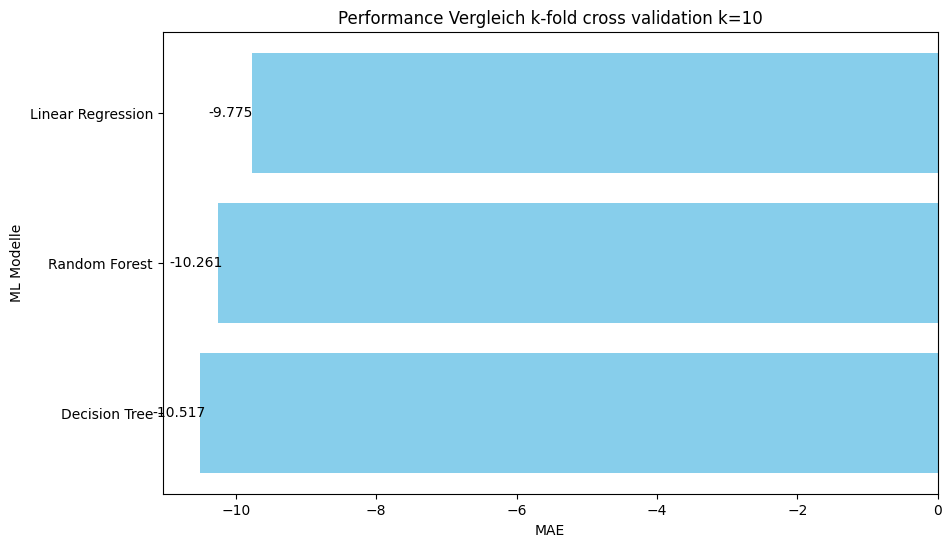

In [14]:
models = [model for model, _ in sorted_cross_val_scores]
scores = [score for _, score in sorted_cross_val_scores]

# Erstellt das Balkendiagramm
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('MAE')
plt.ylabel('ML Modelle')
plt.title('Performance Vergleich k-fold cross validation k=10')
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', ha='center', color='black')

plt.gca().invert_yaxis()  
plt.show()

Wir wissen jetzt welcher Algorithmus am besten performt. Was wir aber nicht wissen ist, waren dafür wirklich 10 folds notwendig oder hätten sogra 2-3 gereicht ?

# ______________________________________________________________




In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

Die folgende Variante macht exakt das gleiche, nur das wir jetzt die möglichkeit haben einzele Aktionen nach jeder Iteration auszuführen.

In [ ]:
all_fold_scores = {model: [] for model in ['Linear Regression', 'Decision Trees', 'Random Forest', 'Support Vector Regression', 'Gradient Boosting Regression']}
placement_history = {model: [] for model in all_fold_scores.keys()}
mean_scores_history = {model: [] for model in all_fold_scores.keys()}  


#for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X,y), start=1): #für skf
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), start=1): #für kf
    print(f"Fold {fold_idx}:")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    linreg.fit(X_train, y_train)
    tree_reg.fit(X_train, y_train)
    rf_reg.fit(X_train, y_train)
    svr.fit(X_train, y_train)
    gb_reg.fit(X_train, y_train)
    
    linreg_predictions = linreg.predict(X_test)
    tree_reg_predictions = tree_reg.predict(X_test)
    rf_reg_predictions = rf_reg.predict(X_test)
    svr_predictions = svr.predict(X_test)
    gb_reg_predictions = gb_reg.predict(X_test)

    linreg_mae = mean_absolute_error(y_test, linreg_predictions)
    tree_reg_mae = mean_absolute_error(y_test, tree_reg_predictions)
    rf_reg_mae = mean_absolute_error(y_test, rf_reg_predictions)
    svr_mae = mean_absolute_error(y_test, svr_predictions)
    gb_reg_mae = mean_absolute_error(y_test, gb_reg_predictions)
    
    all_fold_scores['Linear Regression'].append(linreg_mae)
    all_fold_scores['Decision Trees'].append(tree_reg_mae)
    all_fold_scores['Random Forest'].append(rf_reg_mae)
    all_fold_scores['Support Vector Regression'].append(svr_mae)
    all_fold_scores['Gradient Boosting Regression'].append(gb_reg_mae)

    cross_val_scores_actual_fold = {
        'Linear Regression': linreg_mae,
        'Decision Trees': tree_reg_mae,
        'Random Forest': rf_reg_mae,
        'Support Vector Regression': svr_mae,
        'Gradient Boosting Regression': gb_reg_mae
    }
    
    sorted_cross_val_scores_actual_fold = sorted(cross_val_scores_actual_fold.items(), key=lambda x: x[1], reverse=False)

    for i, (model, score) in enumerate(sorted_cross_val_scores_actual_fold, start=1):
        rounded_score = round(score, 3)
        print(f"{i}. {model}: {rounded_score}")

    # Calculate mean scores and sort them
    mean_scores = {model: np.mean(scores) for model, scores in all_fold_scores.items()}
    sorted_mean_scores = sorted(mean_scores.items(), key=lambda x: x[1], reverse=False)

    print()  # Absatz zwischen der ersten Print-Ausgabe und den Durchschnittswerten

    # Print sorted mean scores with numbering
    for i, (model, mean_score) in enumerate(sorted_mean_scores, start=1):
        print(f"{i}. Durchschnitt für {model} nach {fold_idx} Folds: {round(mean_score, 3)}")
        placement_history[model].append(i)
        mean_scores_history[model].append(round(mean_score, 3))  # Hier wird der Durchschnittswert zu mean_scores_history hinzugefügt
        
    print()



### Ausgabe aller Elemente in all_fold_scores
print("Alle Elemente in all_fold_scores:")
for model, scores in all_fold_scores.items():
    print(f"{model}: {scores}")




### Ausgabe aller Elemente in placement_history
print("\nAlle Elemente in placement_history:")
for model, history in placement_history.items():
    print(f"{model}: {history}")

### Ausgabe aller Elemente in placement_history
print("\nAlle Elemente in mean_scores_history:")
for model, mean_scores in mean_scores_history.items():
    print(f"{model}: {mean_scores}")

#print(mean_scores_history['Random Forest Classifier'])

In [ ]:
plt.figure(figsize=(10, 6))
for model, placements in placement_history.items():
    plt.plot(range(1, len(placements) + 1), placements, marker='o', label=model)

plt.gca().invert_yaxis()  
plt.xticks(range(1, kf.get_n_splits() + 1))
plt.yticks(range(1, max(max(placements) for placements in placement_history.values()) + 1))  

plt.xlabel('Fold')
plt.ylabel('Platzierung')
plt.title('Platzierung der Algorithmen nach jeder Faltung')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()


In [ ]:
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [ ]:
mae_rf = mean_scores_history['Random Forest']
mae_lr = mean_scores_history['Linear Regression']
mae_tree = mean_scores_history['Decision Trees']
mae_svr = mean_scores_history['Support Vector Regression']
mae_boost = mean_scores_history['Gradient Boosting Regression']

best_model_name = sorted_cross_val_scores[0][0]

if best_model_name == 'Random Forest':
    mae_best = mae_rf
elif best_model_name == 'Linear Regression':
    mae_best = mae_lr
elif best_model_name == 'Decision Trees':
    mae_best = mae_tree
elif best_model_name == 'Support Vector Regression':
    mae_best = mae_svr
elif best_model_name == 'Gradient Boosting Regression':
    mae_best = mae_boost


def find_earliest_significant_fold_ttest(mae_best, mae):
    for i in range(len(mae_best)):
        t_stat, p_value = ttest_ind(mae_best[:i+1], mae[:i+1],alternative='less')  # [:i] alle Objekte bis i                                                                   
        if p_value < 0.05: #standart Wert umsohöher der Wert desto mehr wird quasi geschätzt 
            return i+1, p_value
    return None, None

def find_earliest_significant_fold_manwhitneyu(mae_best, mae):
    for i in range(len(mae_best)):
        t_stat, p_value = mannwhitneyu(mae_best[:i+1], mae[:i+1],alternative='less')  # [:i] alle Objekte bis i
                                                                                
        if p_value < 0.05: #standart Wert umsohöher der Wert desto mehr wird quasi geschätzt 
            return i+1, p_value
    return None, None


algorithms = {
            'Linear Regression': mae_lr,
            'Decision Trees': mae_tree,
            'Random Forest': mae_rf,
            'Support Vector Regression': mae_svr,
            'Gradient Boosting Regression': mae_boost
    }

print("T-Test:")
for algo_name, mae in algorithms.items():
    if mae_best != mae:
        fold, p_value = find_earliest_significant_fold_ttest(mae_best, mae)
        if fold:
            print(f"{best_model_name} ist signifikant besser als {algo_name} ab Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} ist nicht signifikant besser als {algo_name} innerhalb von 10 Folds.")

print("Mann-Whitney-U-Test:")
for algo_name, mae in algorithms.items():
    if mae_best != mae:
        fold, p_value = find_earliest_significant_fold_manwhitneyu(mae_best, mae)
        if fold:
            print(f"{best_model_name} ist signifikant besser als {algo_name} ab Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} ist nicht signifikant besser als {algo_name} innerhalb von 10 Folds.")
